In [1]:
#Census Income Project
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind,ttest_rel
from scipy import stats

In [2]:
#import data
data1=pd.read_csv('adult.csv',na_values='?',skipinitialspace=True)
data1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data=pd.read_csv('adult.csv',na_values='?',skipinitialspace=True)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [5]:
#EDA
data.shape

(48842, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
data=data.dropna()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [13]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [14]:
data['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [13]:
#data['income']=data['income'].map({'<=50K': 0, '>50K': 1})
#data.head(10)

In [14]:
#data['income']=np.where(data['income']=='<=50K',0,1)
#data['income'].dtype

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['income']= le.fit_transform(data['income'].values)


In [16]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,0
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,1
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0


In [17]:
#Statastical Summary
data_num = data.drop(['educational-num','income'],axis = 1)

In [18]:
data_num.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


In [19]:
data.describe(include=["O"]).T

,count,unique,top,freq
workclass,45222,7,Private,33307
education,45222,16,HS-grad,14783
marital-status,45222,7,Married-civ-spouse,21055
occupation,45222,14,Craft-repair,6020
relationship,45222,6,Husband,18666
race,45222,5,White,38903
gender,45222,2,Male,30527
native-country,45222,41,United-States,41292


In [20]:
data['occupation'].nunique()

14

In [21]:
6020/14

430.0

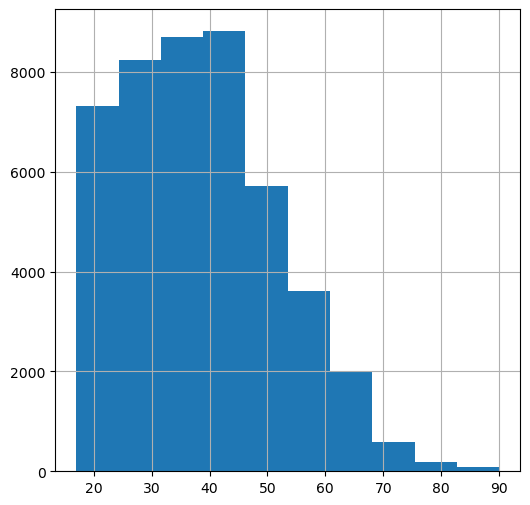

In [21]:
#DAta distribution
#Univariate  -one var
data['age'].hist(figsize=(6,6))
plt.show()

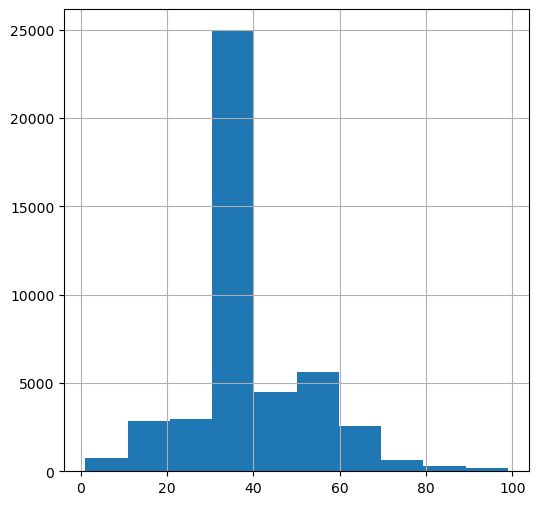

In [23]:
data['hours-per-week'].hist(figsize=(6,6))
plt.show()

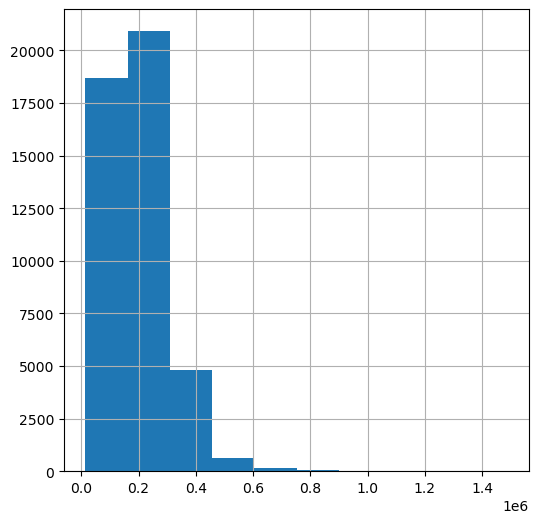

In [24]:
data['fnlwgt'].hist(figsize=(6,6))
plt.show()

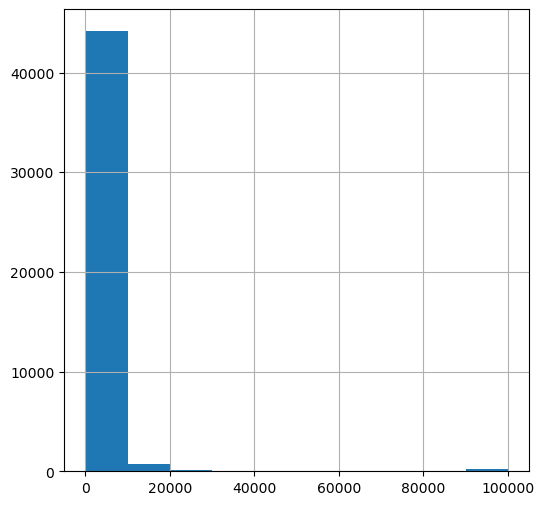

In [25]:
data['capital-gain'].hist(figsize=(6,6))
plt.show()

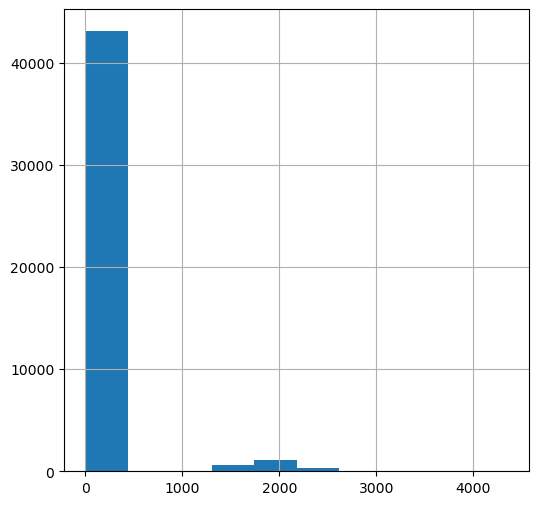

In [26]:
data['capital-loss'].hist(figsize=(6,6))
plt.show()

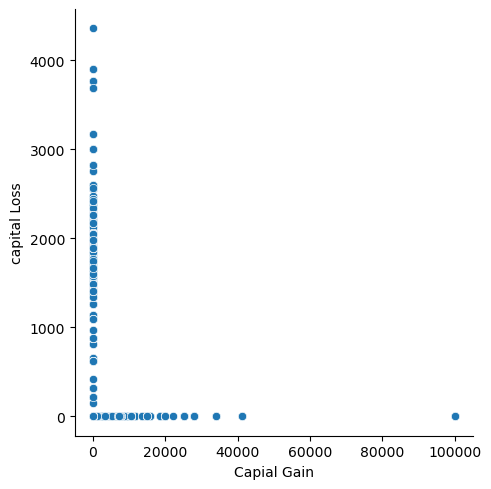

In [22]:
#Bivaiate - two var
sns.relplot('capital-gain','capital-loss',data=data)
plt.xlabel("Capial Gain")
plt.ylabel("capital Loss")
plt.show()

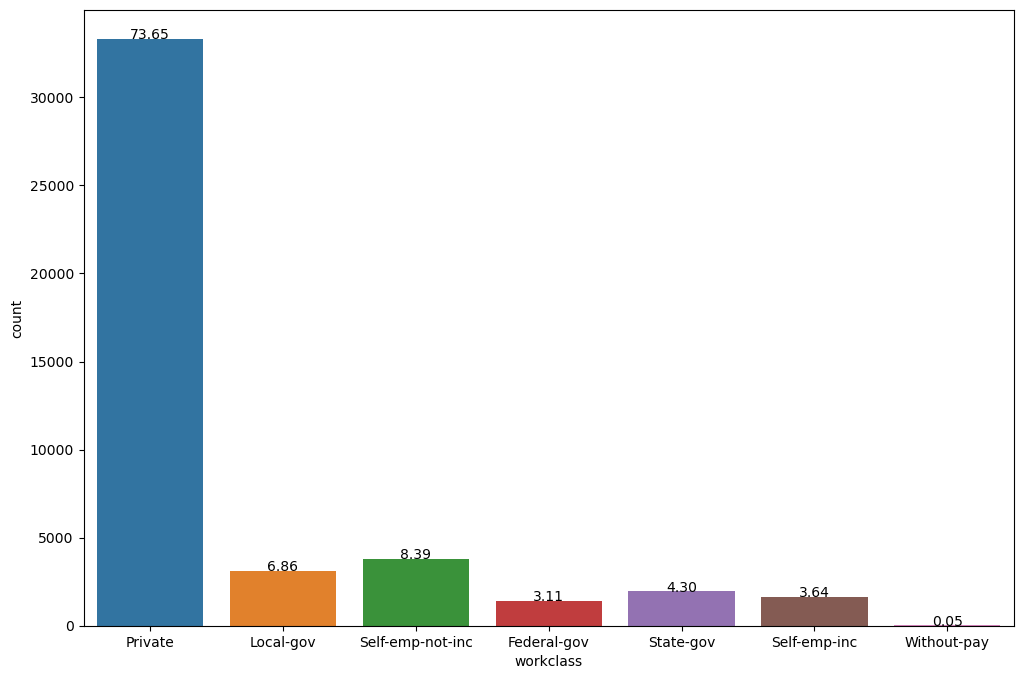

In [23]:
#Work class distribution
plt.figure(figsize=(12,8))

total = float(len(data["income"]) )

ax = sns.countplot(x="workclass", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height +3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.show()

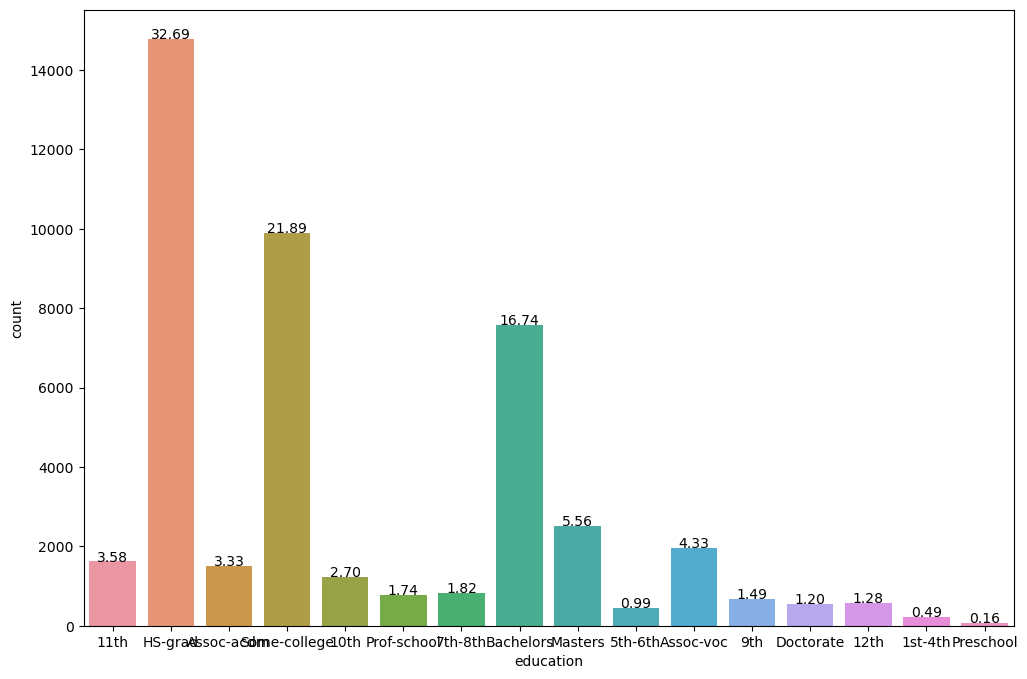

In [24]:
plt.figure(figsize=(12,8))

total = float(len(data))

ax = sns.countplot(x="education", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height +3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.show()

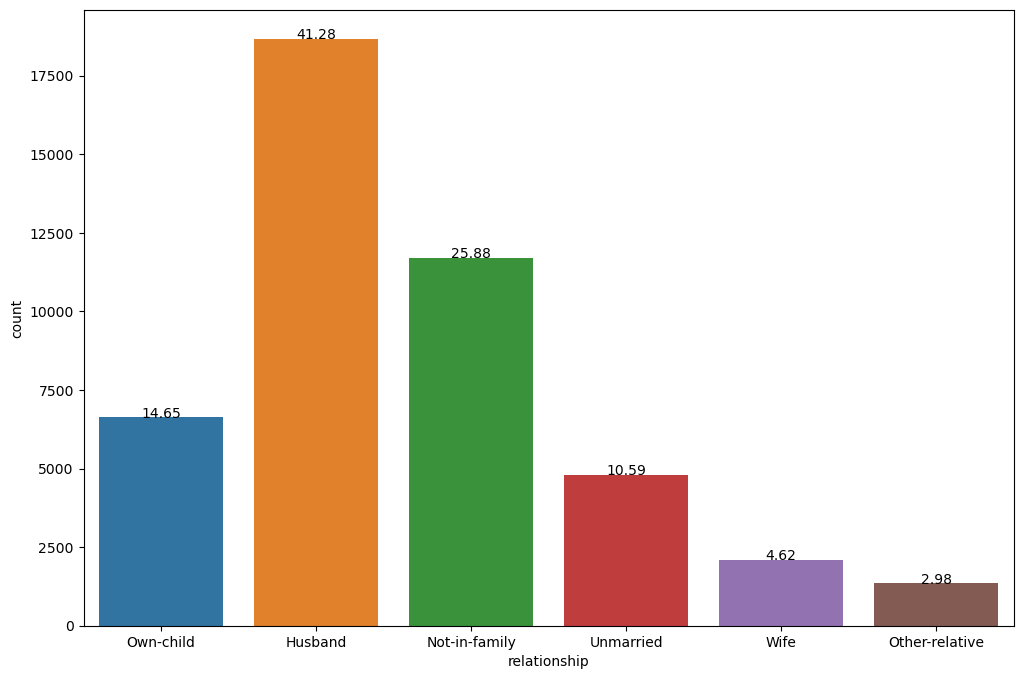

In [30]:
plt.figure(figsize=(12,8))

total = float(len(data) )

ax = sns.countplot(x="relationship", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height +3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.show()

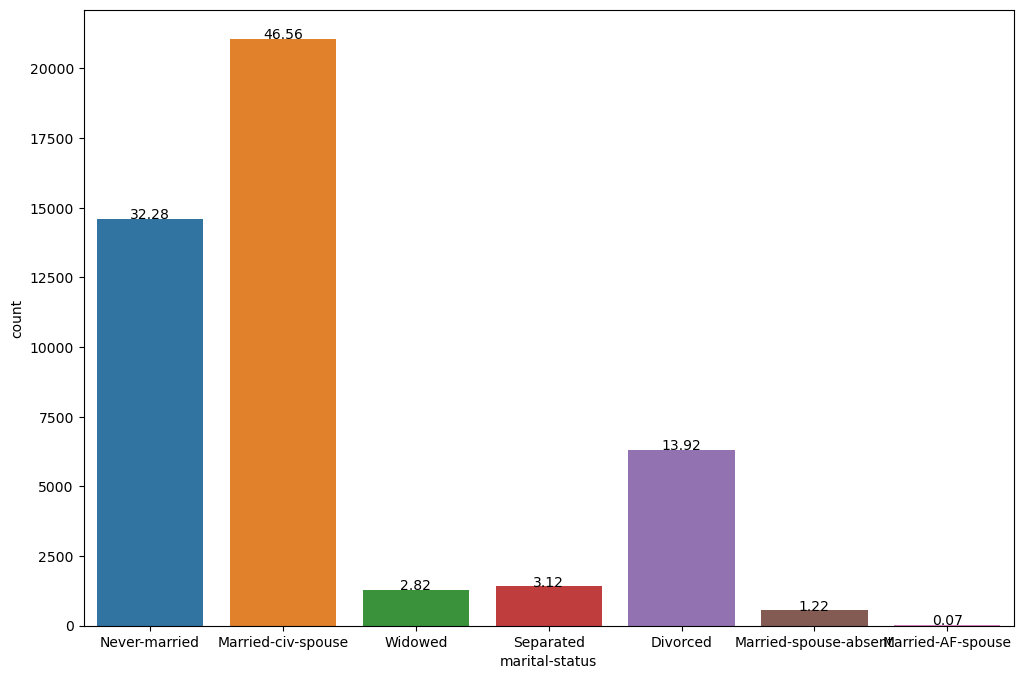

In [31]:
plt.figure(figsize=(12,8))

total = float(len(data) )

ax = sns.countplot(x="marital-status", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height +3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.show()

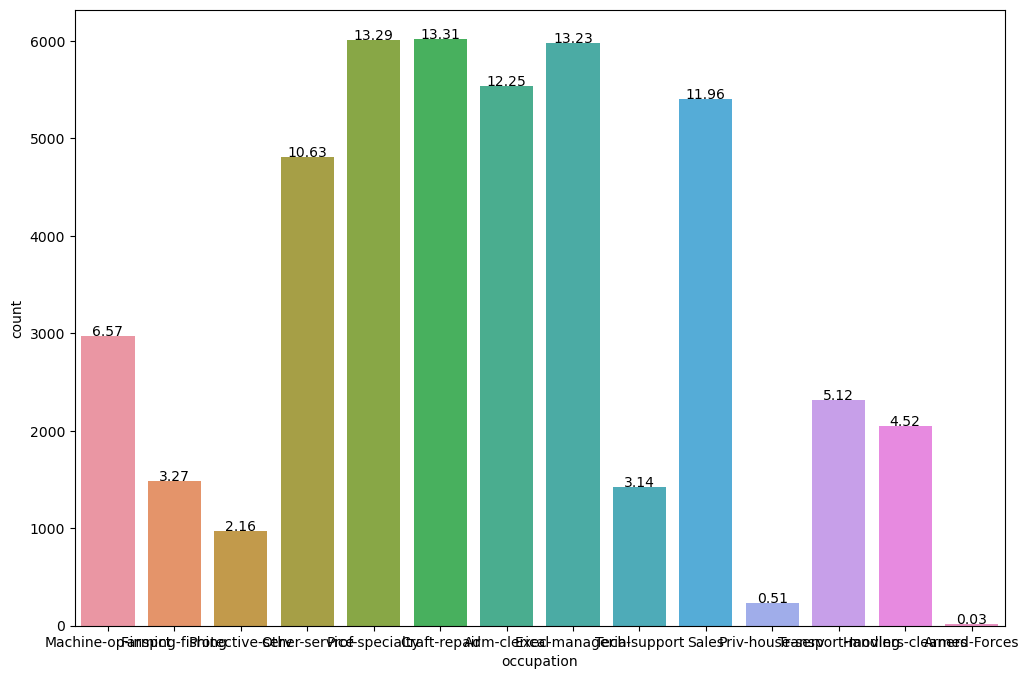

In [32]:
plt.figure(figsize=(12,8))

total = float(len(data) )

ax = sns.countplot(x="occupation", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height +3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.show()

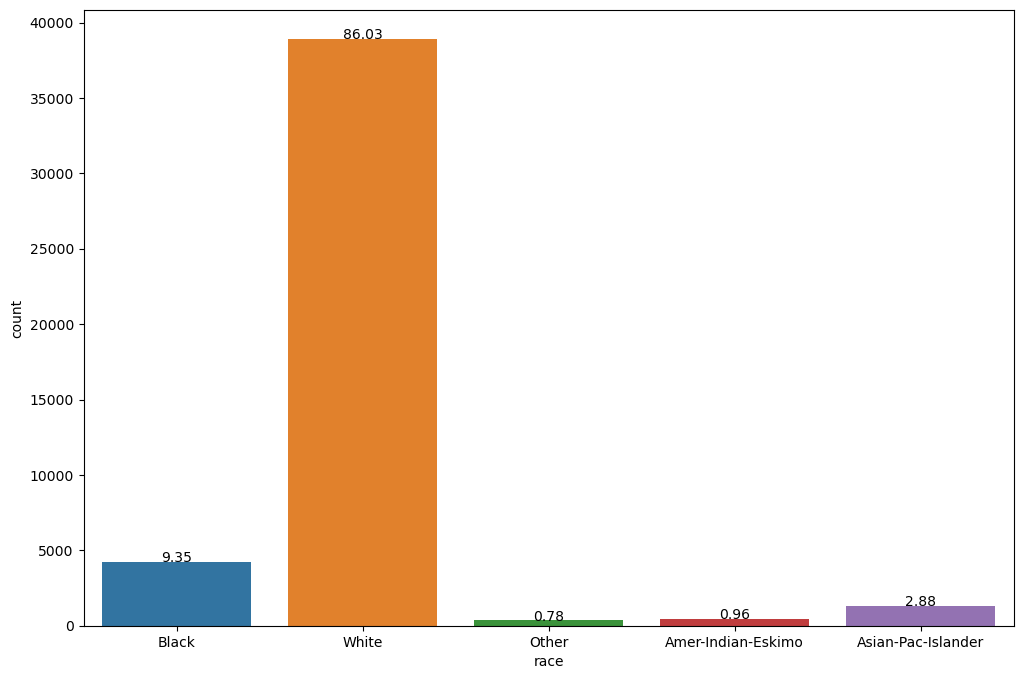

In [33]:
plt.figure(figsize=(12,8))

total = float(len(data) )

ax = sns.countplot(x="race", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height +3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.show()

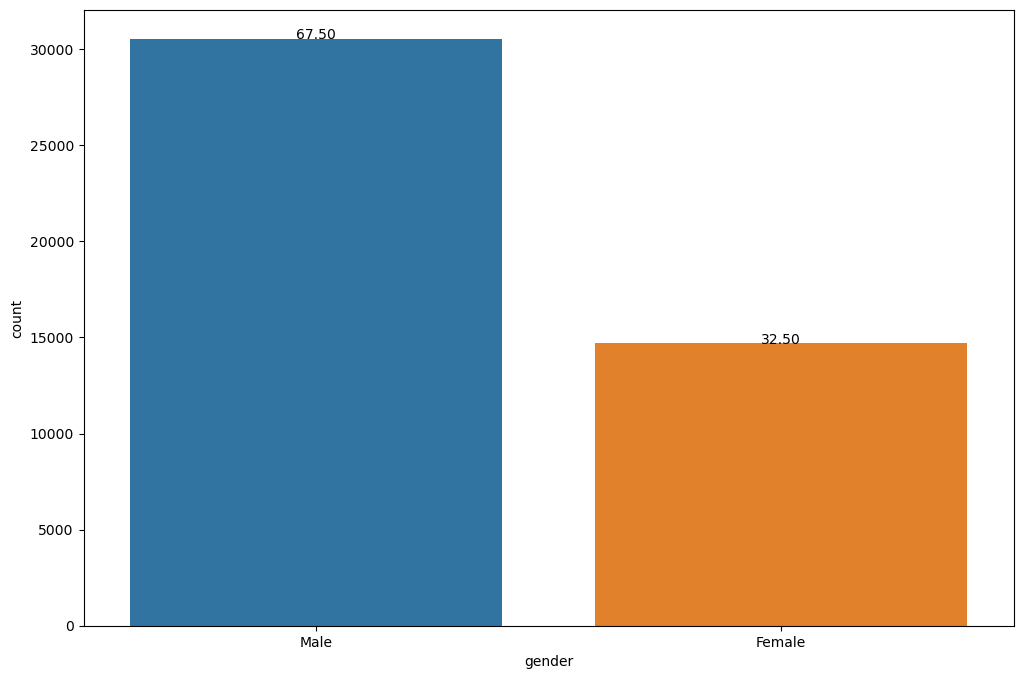

In [34]:
plt.figure(figsize=(12,8))

total = float(len(data) )

ax = sns.countplot(x="gender", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height +3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.show()

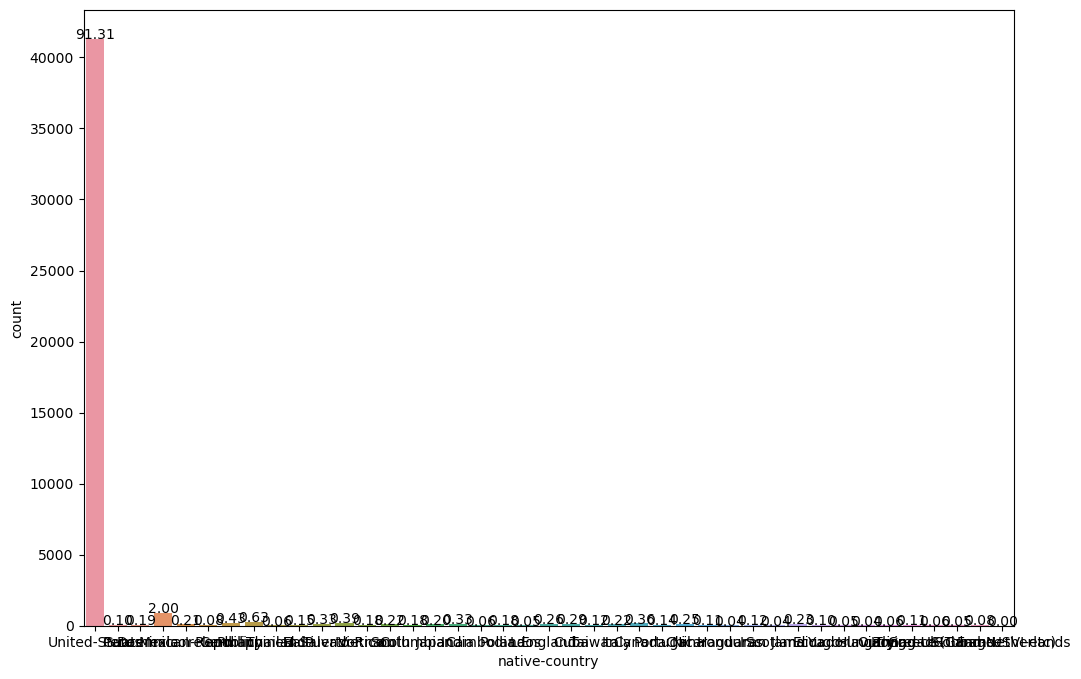

In [35]:
plt.figure(figsize=(12,8))

total = float(len(data) )

ax = sns.countplot(x="native-country", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height +3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.show()

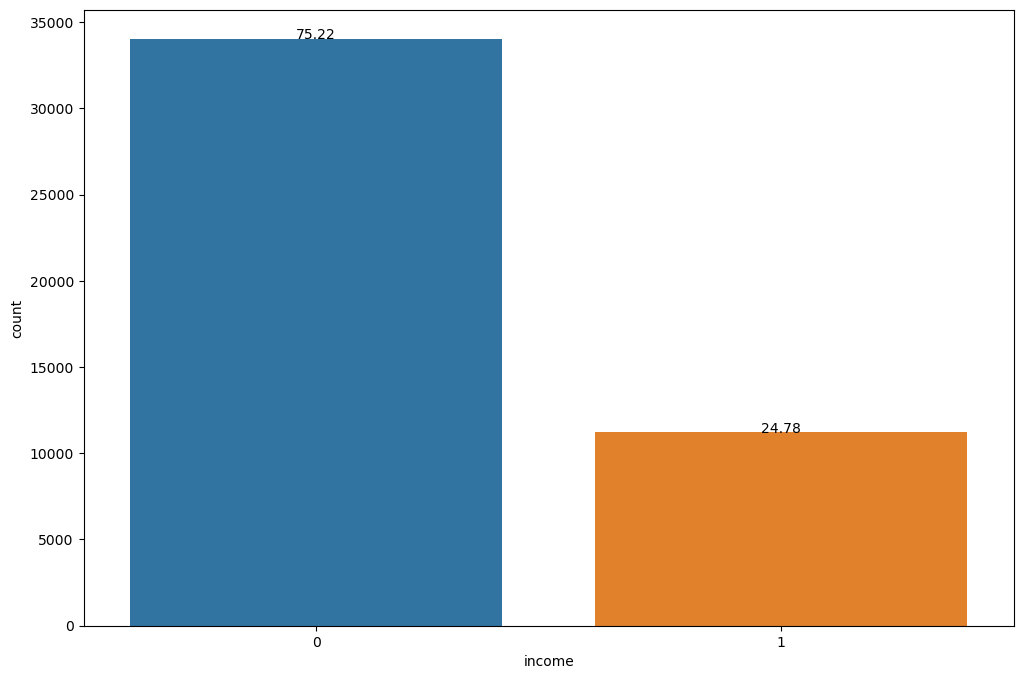

In [36]:
plt.figure(figsize=(12,8))

total = float(len(data) )

ax = sns.countplot(x="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height +3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.show()

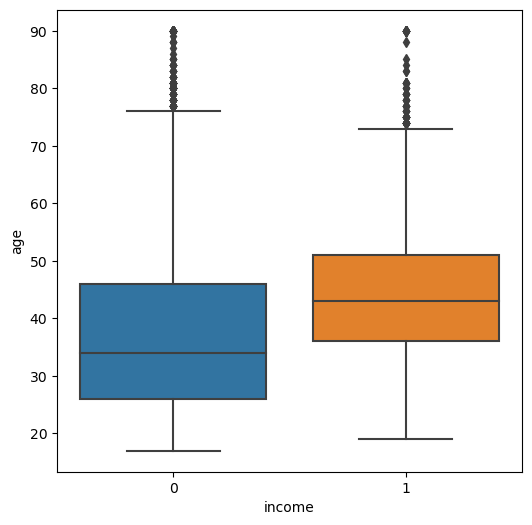

In [37]:
#Bivariate Analysis using Boxplot
fig=plt.figure(figsize=(6,6))
sns.boxplot(x="income",y="age",data=data)
plt.show()


In [38]:
data[['income','age']].groupby(['income'],as_index=False).mean().sort_values(by='age',ascending=False)

,income,age
1,1,44.006067
0,0,36.749427


In [39]:
import random
data=data[(np.abs(stats.zscore(data["age"]))<3)]
income_1=data[data['income']==1]['age']
income_0=data[data['income']==0]['age']
income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 50)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 50)

In [40]:
from scipy.stats import ttest_ind
ttest,pval=ttest_ind(income_1,income_0,equal_var=False)
print("P value " ,pval)
if(pval < 0.05):
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

P value  0.013369515165229464
we reject null hypothesis


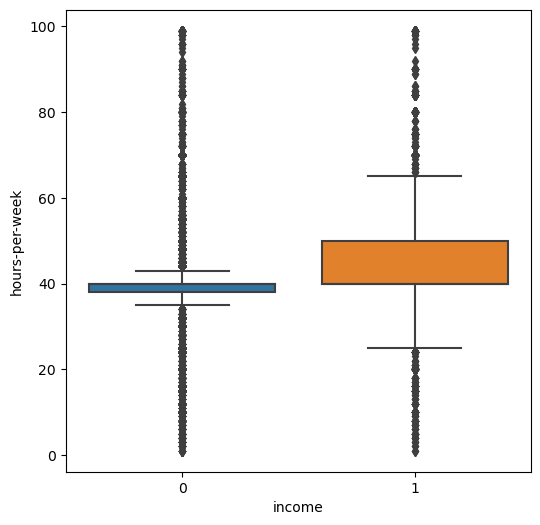

In [41]:
fig=plt.figure(figsize=(6,6))
sns.boxplot(x="income",y="hours-per-week",data=data)
plt.show()


In [42]:
data[['income','hours-per-week']].groupby(['income'],as_index=False).mean().sort_values(by='hours-per-week',ascending=False)

,income,hours-per-week
1,1,45.711793
0,0,39.413305


In [44]:
import random
data=data[(np.abs(stats.zscore(data["hours-per-week"]))<3)]
income_1=data[data['income']==1]['hours-per-week']
income_0=data[data['income']==0]['hours-per-week']
income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 50)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 50)

In [45]:
from scipy.stats import ttest_ind
ttest,pval=ttest_ind(income_1,income_0,equal_var=False)
print("P value " ,pval)
if(pval < 0.05):
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

P value  0.04375550496246133
we reject null hypothesis


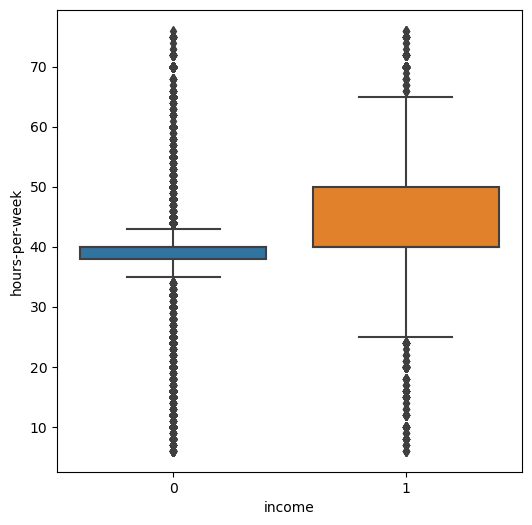

In [46]:
fig=plt.figure(figsize=(6,6))
sns.boxplot(x="income",y="hours-per-week",data=data)
plt.show()


In [47]:
data[['income','fnlwgt']].groupby(['income'],as_index=False).mean().sort_values(by='fnlwgt',ascending=False)

,income,fnlwgt
0,0,190466.284158
1,1,188673.632183


In [48]:
import random
data=data[(np.abs(stats.zscore(data["fnlwgt"]))<3)]
income_1=data[data['income']==1]['fnlwgt']
income_0=data[data['income']==0]['fnlwgt']
income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 50)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 50)

In [49]:
from scipy.stats import ttest_ind
ttest,pval=ttest_ind(income_1,income_0,equal_var=False)
print("P value " ,pval)
if(pval < 0.05):
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

P value  0.3527881600831211
we accept null hypothesis


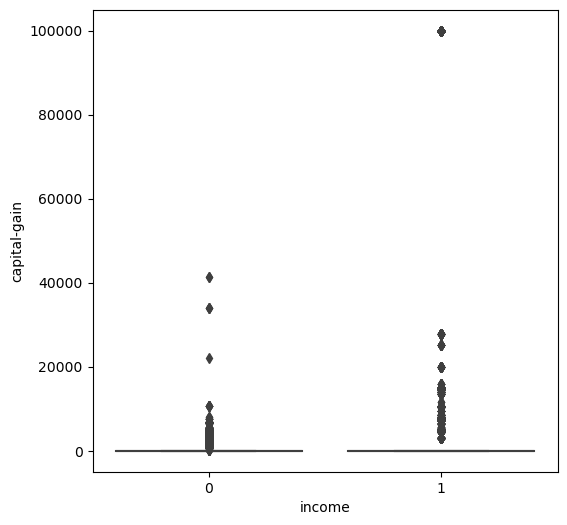

In [50]:
fig=plt.figure(figsize=(6,6))
sns.boxplot(x="income",y="capital-gain",data=data)
plt.show()


In [51]:
data[['income','capital-gain']].groupby(['income'],as_index=False).mean().sort_values(by='capital-gain',ascending=False)

,income,capital-gain
1,1,3938.933125
0,0,145.592485


In [52]:
import random
data=data[(np.abs(stats.zscore(data["capital-gain"]))<3)]
income_1=data[data['income']==1]['capital-gain']
income_0=data[data['income']==0]['capital-gain']
income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

In [53]:
from scipy.stats import ttest_ind
ttest,pval=ttest_ind(income_1,income_0,equal_var=False)
print("P value " ,pval)
if(pval < 0.05):
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

P value  0.002148370533540883
we reject null hypothesis


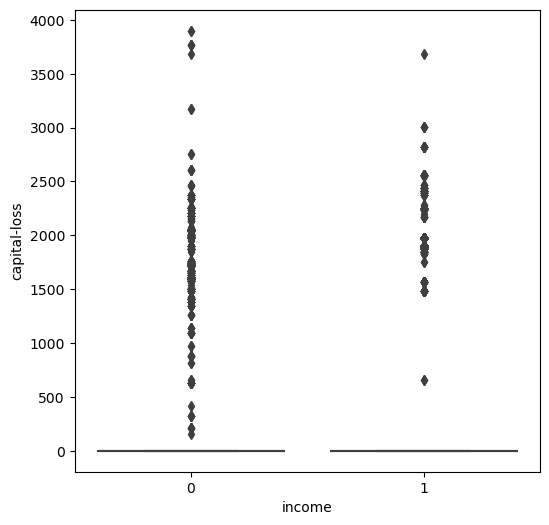

In [54]:
fig=plt.figure(figsize=(6,6))
sns.boxplot(x="income",y="capital-loss",data=data)
plt.show()


In [55]:
data[['income','capital-loss']].groupby(['income'],as_index=False).mean().sort_values(by='capital-loss',ascending=False)

,income,capital-loss
1,1,198.984596
0,0,53.902841


In [56]:
import random
data=data[(np.abs(stats.zscore(data["capital-loss"]))<3)]
income_1=data[data['income']==1]['capital-loss']
income_0=data[data['income']==0]['capital-loss']
income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 30)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 30)

In [57]:
from scipy.stats import ttest_ind
ttest,pval=ttest_ind(income_1,income_0,equal_var=False)
print("P value " ,pval)
if(pval < 0.05):
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

P value  nan
we accept null hypothesis


In [ ]:
#Hypothesis for categorical data

In [58]:
# contingency table
c_t = pd.crosstab(data['workclass'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
workclass,,
Federal-gov,1,3
Local-gov,5,4
Private,52,10
Self-emp-inc,1,1
Self-emp-not-inc,2,2
State-gov,2,0


In [59]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


dof=5
p_value 0.026440588976881736
[[ 3.03614458  0.96385542]
 [ 6.8313253   2.1686747 ]
 [47.06024096 14.93975904]
 [ 1.51807229  0.48192771]
 [ 3.03614458  0.96385542]
 [ 1.51807229  0.48192771]]
probability=0.950, critical=11.070, stat=12.692
Dependent (reject H0)


In [60]:
# contingency table
c_t = pd.crosstab(data['education'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
education,,
10th,2,0
11th,6,0
12th,1,0
1st-4th,1,0
7th-8th,2,0
9th,1,0
Assoc-acdm,2,0
Assoc-voc,2,0
Bachelors,11,8


In [61]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


dof=11
p_value 0.33036057742482444
[[ 1.51807229  0.48192771]
 [ 4.55421687  1.44578313]
 [ 0.75903614  0.24096386]
 [ 0.75903614  0.24096386]
 [ 1.51807229  0.48192771]
 [ 0.75903614  0.24096386]
 [ 1.51807229  0.48192771]
 [ 1.51807229  0.48192771]
 [14.42168675  4.57831325]
 [17.45783133  5.54216867]
 [ 3.79518072  1.20481928]
 [14.42168675  4.57831325]]
probability=0.950, critical=19.675, stat=12.456
Independent (fail to reject H0)


In [62]:
# contingency table
c_t = pd.crosstab(data['marital-status'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
marital-status,,
Divorced,10,0
Married-civ-spouse,16,19
Married-spouse-absent,2,0
Never-married,31,1
Separated,2,0
Widowed,2,0


In [63]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


dof=5
p_value 1.3381242979206064e-05
[[ 7.59036145  2.40963855]
 [26.56626506  8.43373494]
 [ 1.51807229  0.48192771]
 [24.28915663  7.71084337]
 [ 1.51807229  0.48192771]
 [ 1.51807229  0.48192771]]
probability=0.950, critical=11.070, stat=30.215
Dependent (reject H0)


In [64]:
# contingency table
c_t = pd.crosstab(data['occupation'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
occupation,,
Adm-clerical,10,2
Craft-repair,12,3
Exec-managerial,7,3
Farming-fishing,1,0
Handlers-cleaners,2,1
Machine-op-inspct,5,0
Other-service,10,0
Priv-house-serv,1,0
Prof-specialty,9,7


In [65]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


dof=12
p_value 0.058769832973436215
[[ 9.10843373  2.89156627]
 [11.38554217  3.61445783]
 [ 7.59036145  2.40963855]
 [ 0.75903614  0.24096386]
 [ 2.27710843  0.72289157]
 [ 3.79518072  1.20481928]
 [ 7.59036145  2.40963855]
 [ 0.75903614  0.24096386]
 [12.14457831  3.85542169]
 [ 0.75903614  0.24096386]
 [ 2.27710843  0.72289157]
 [ 2.27710843  0.72289157]
 [ 2.27710843  0.72289157]]
probability=0.950, critical=21.026, stat=20.466
Independent (fail to reject H0)


In [66]:
# contingency table
c_t = pd.crosstab(data['relationship'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
relationship,,
Husband,13,18
Not-in-family,24,1
Own-child,12,0
Unmarried,11,0
Wife,3,1


In [67]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


dof=4
p_value 1.5996332099446223e-06
[[23.53012048  7.46987952]
 [18.97590361  6.02409639]
 [ 9.10843373  2.89156627]
 [ 8.34939759  2.65060241]
 [ 3.03614458  0.96385542]]
probability=0.950, critical=9.488, stat=32.380
Dependent (reject H0)


In [68]:
# contingency table
c_t = pd.crosstab(data['race'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
race,,
Asian-Pac-Islander,3,0
Black,4,0
Other,4,0
White,52,20


In [69]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


dof=3
p_value 0.2587158953453994
[[ 2.27710843  0.72289157]
 [ 3.03614458  0.96385542]
 [ 3.03614458  0.96385542]
 [54.65060241 17.34939759]]
probability=0.950, critical=7.815, stat=4.026
Independent (fail to reject H0)


In [70]:
# contingency table
c_t = pd.crosstab(data['gender'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
gender,,
Female,32,1
Male,31,19


In [71]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


dof=1
p_value 0.0007155786092882721
[[25.04819277  7.95180723]
 [37.95180723 12.04819277]]
probability=0.950, critical=3.841, stat=11.448
Dependent (reject H0)


In [72]:
# contingency table
c_t = pd.crosstab(data['native-country'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
native-country,,
Dominican-Republic,2,0
England,1,0
Germany,1,0
India,1,0
Japan,1,0
Mexico,2,1
Philippines,1,0
Poland,1,0
Portugal,1,0


In [73]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


dof=10
p_value 0.9610177856391237
[[ 1.51807229  0.48192771]
 [ 0.75903614  0.24096386]
 [ 0.75903614  0.24096386]
 [ 0.75903614  0.24096386]
 [ 0.75903614  0.24096386]
 [ 2.27710843  0.72289157]
 [ 0.75903614  0.24096386]
 [ 0.75903614  0.24096386]
 [ 0.75903614  0.24096386]
 [ 0.75903614  0.24096386]
 [53.13253012 16.86746988]]
probability=0.950, critical=18.307, stat=3.670
Independent (fail to reject H0)


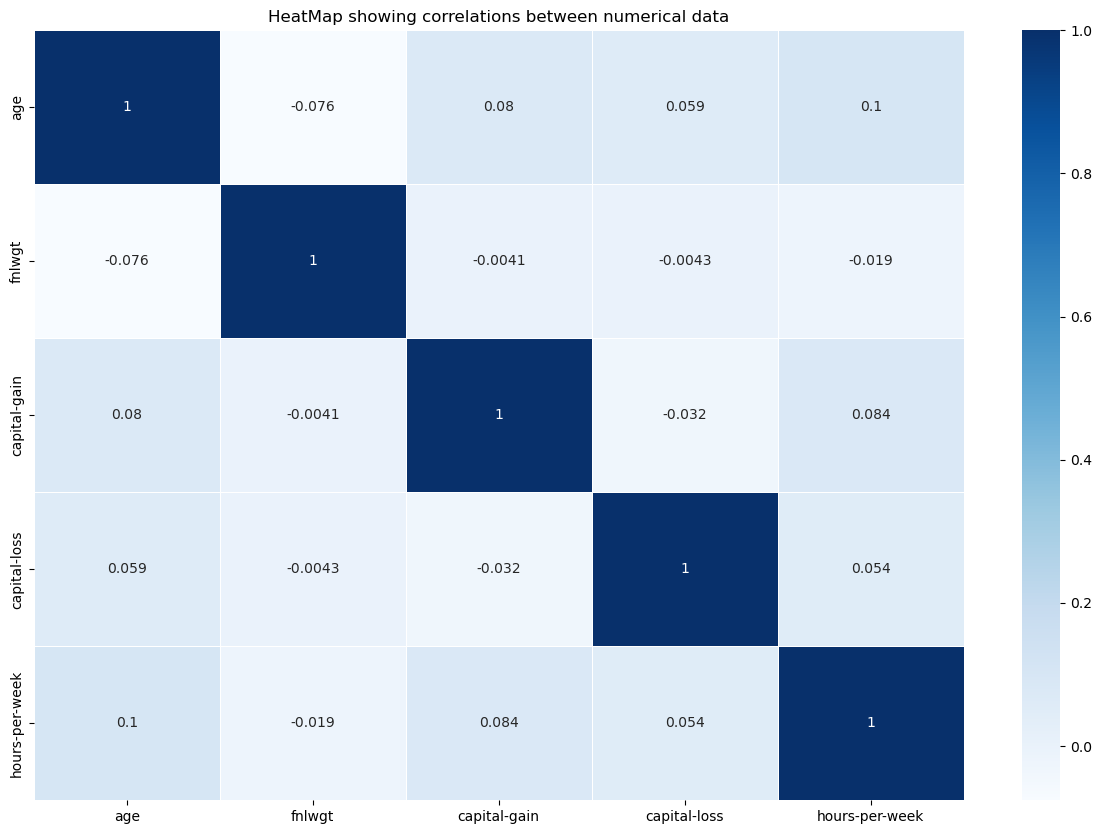

In [74]:
#Multivariate Relationship for numerical variable
plt.figure(figsize=(15,10))
sns.heatmap(data_num.corr(),annot=True,linewidth=.5,cmap="Blues")
plt.title('HeatMap showing correlations between numerical data')
plt.show()

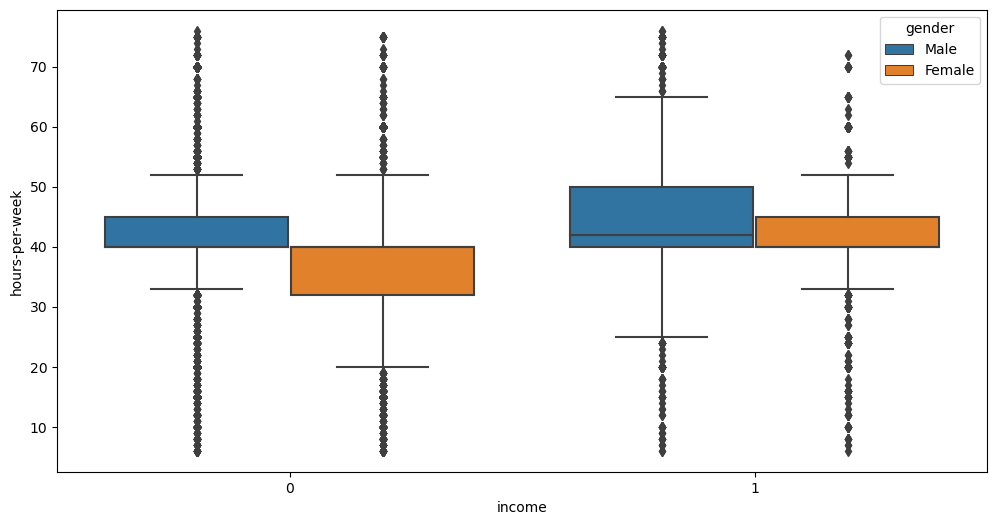

In [75]:
plt.figure(figsize=(12,6))
sns.boxplot(x="income",y="hours-per-week",hue='gender',data=data)
plt.show()

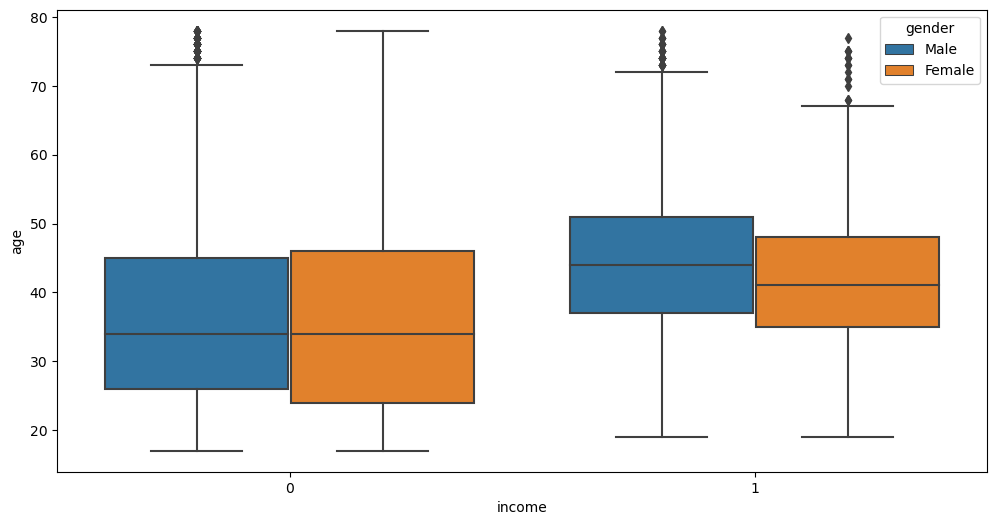

In [76]:
plt.figure(figsize=(12,6))
sns.boxplot(x="income",y="age",hue='gender',data=data)
plt.show()

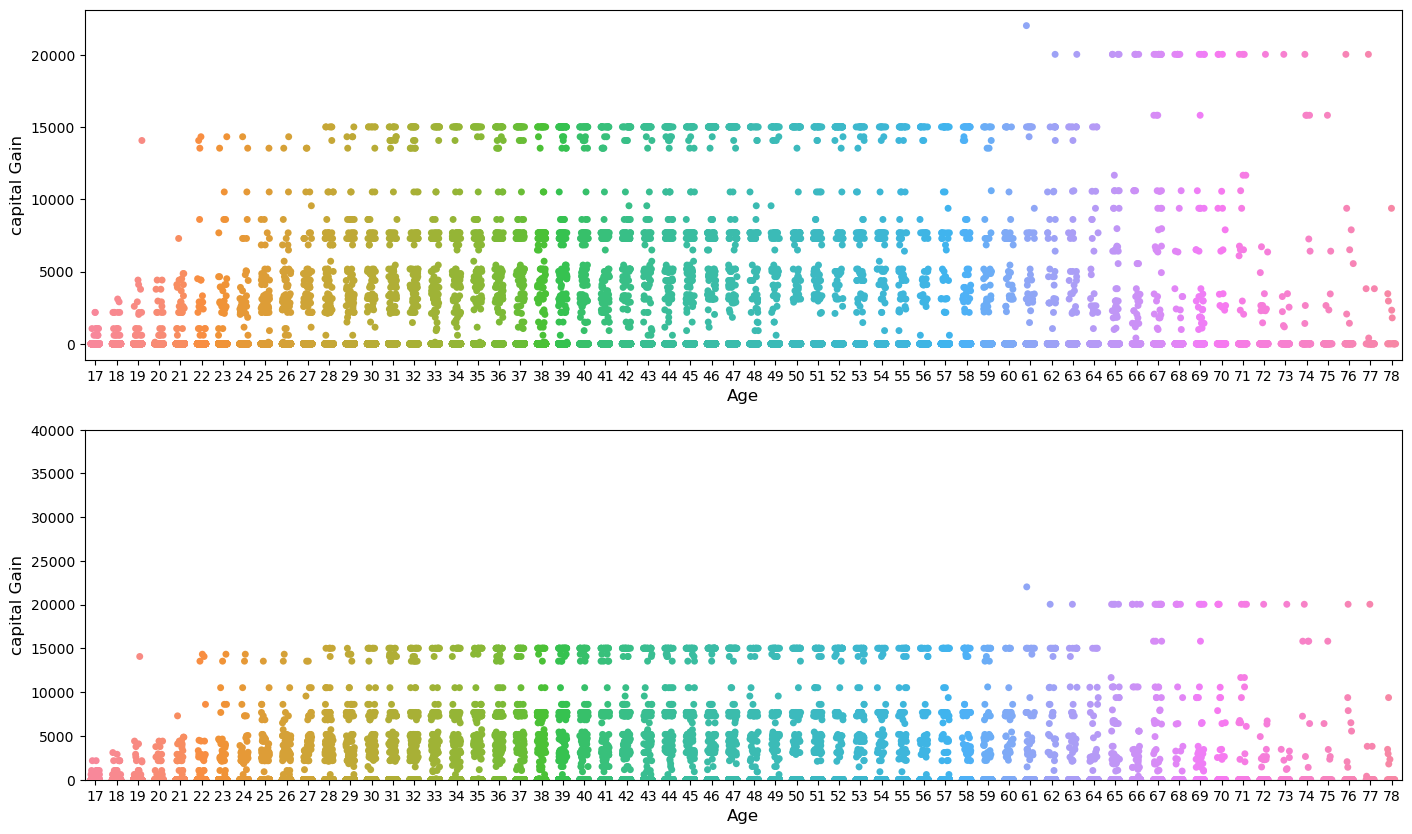

In [77]:
#other multivariate analysis
fig=plt.figure(figsize=(17,10))
ax=fig.add_subplot(2,1,1)
sns.stripplot('age','capital-gain',data=data,jitter=0.2,ax=ax);
plt.xlabel('Age',fontsize=12);
plt.ylabel('capital Gain',fontsize=12)
ax=fig.add_subplot(2,1,2)
sns.stripplot('age','capital-gain',data=data,jitter=0.2,ax=ax);
plt.xlabel('Age',fontsize=12);
plt.ylabel('capital Gain',fontsize=12);
plt.ylim(0,40000);

In [78]:
cols = ['workclass','occupation']
cat_col = data.dtypes[data.dtypes == 'object']
for col in cat_col.index:
    if col in cols:
        print(f"======================================={col}=========================")
        print(data[data['age'] == 90][col].value_counts())
    else:
        continue

=======================================workclass=========================
Series([], Name: workclass, dtype: int64)
=======================================occupation=========================
Series([], Name: occupation, dtype: int64)


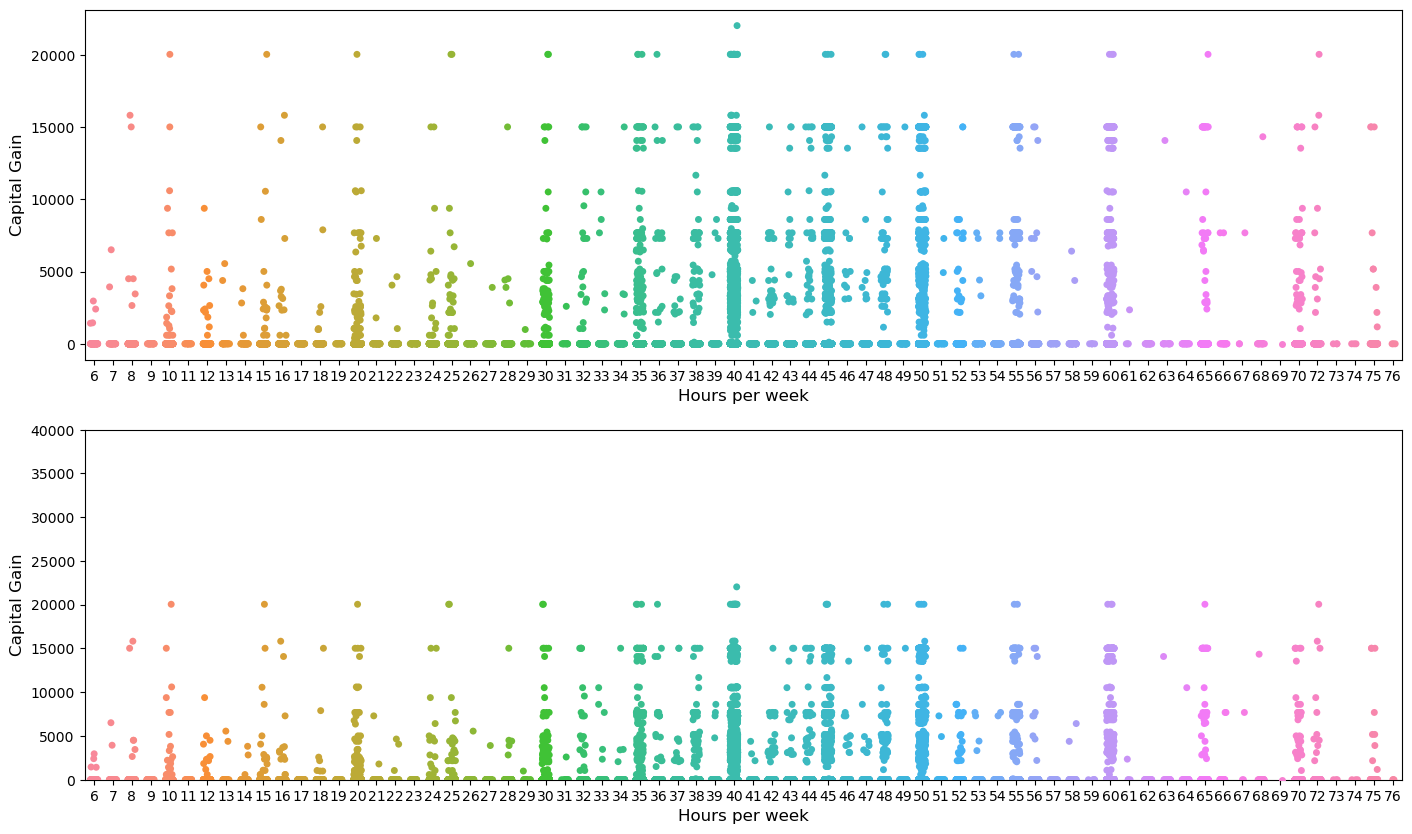

In [79]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('hours-per-week', 'capital-gain', data = data,
         jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('hours-per-week', 'capital-gain', data = data,
         jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

In [80]:
cols = ['workclass','occupation']
cat_col = data.dtypes[data.dtypes == 'object']
for col in cat_col.index:
    if col in cols:
        print(f"======================================={col}=========================")
        print(data[data['hours-per-week'] == 99][col].value_counts())
    else:
        continue

=======================================workclass=========================
Series([], Name: workclass, dtype: int64)
=======================================occupation=========================
Series([], Name: occupation, dtype: int64)


In [81]:
#Summary Statistics
data["capital_change"] = data["capital-gain"] - data["capital-loss"]
data["capital_change"].describe()

count    41614.000000
mean       570.557096
std       2326.849216
min      -1258.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      22040.000000
Name: capital_change, dtype: float64

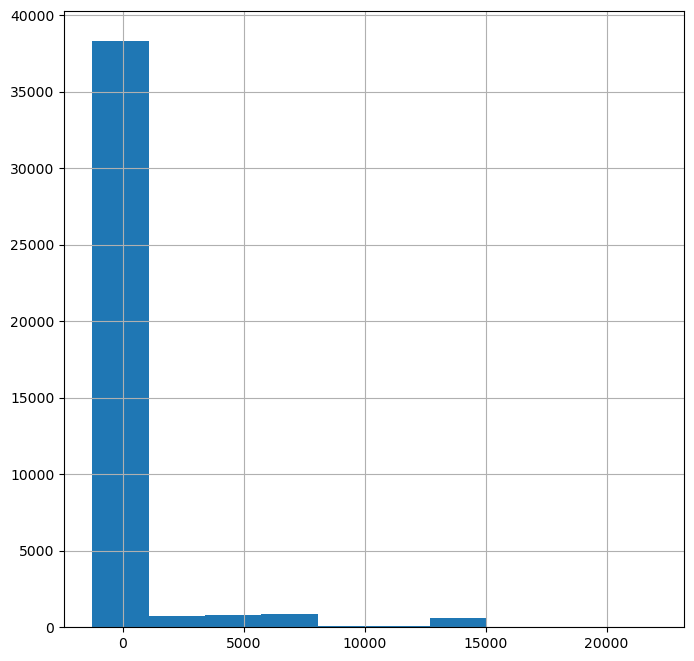

In [82]:
#Distribution
data["capital_change"].hist(figsize=(8,8))
plt.show()

In [83]:
income_1 = data[data['income']==1]["capital_change"]
income_0 = data[data['income']==0]["capital_change"]

data = data[(np.abs(stats.zscore(data["age"])) < 3)] 

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 50)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 50)

ttest,pval = ttest_ind(income_1,income_0, equal_var=0)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 3.3898349202306095
p-value 0.0013774586086973558
we reject null hypothesis


In [84]:
#Selectinf futures
#convert sex values to 0 & 1
data['gender']=data['gender'].map({'Male':0,'Female':1})
data['gender']

0        0
1        0
2        0
3        0
5        0
        ..
48837    1
48838    0
48839    1
48840    0
48841    1
Name: gender, Length: 41597, dtype: int64

In [85]:
data["marital-status"]

0             Never-married
1        Married-civ-spouse
2        Married-civ-spouse
3        Married-civ-spouse
5             Never-married
                ...        
48837    Married-civ-spouse
48838    Married-civ-spouse
48839               Widowed
48840         Never-married
48841    Married-civ-spouse
Name: marital-status, Length: 41597, dtype: object

In [86]:
# Create Married Column - Binary Yes(1) or No(0)
data["marital-status"] = data["marital-status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
data["marital-status"] = data["marital-status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
data["marital-status"] = data["marital-status"].map({"Married":1, "Single":0})
data["marital-status"] = data["marital-status"].astype(int)
data["marital-status"]

0        0
1        1
2        1
3        1
5        0
        ..
48837    1
48838    1
48839    0
48840    0
48841    1
Name: marital-status, Length: 41597, dtype: int32

In [87]:
# Drop the data you don't want to use
data.drop(labels=["workclass","education","occupation","relationship","race","native-country", "capital_change"], axis = 1, inplace = True)

In [89]:
data.head()

,age,fnlwgt,educational-num,marital-status,gender,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0,0,0,0,40,0
1,38,89814,9,1,0,0,0,50,0
2,28,336951,12,1,0,0,0,40,1
3,44,160323,10,1,0,7688,0,40,1
5,34,198693,6,0,0,0,0,30,0


In [91]:
data.columns

Index(['age', 'fnlwgt', 'educational-num', 'marital-status', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'income'],
      dtype='object')

# Model Building

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [93]:
array = data.values
array

array([[    25, 226802,      7, ...,      0,     40,      0],
       [    38,  89814,      9, ...,      0,     50,      0],
       [    28, 336951,     12, ...,      0,     40,      1],
       ...,
       [    58, 151910,      9, ...,      0,     40,      0],
       [    22, 201490,      9, ...,      0,     20,      0],
       [    52, 287927,      9, ...,      0,     40,      1]], dtype=int64)

In [94]:
X = array[:,0:8]
Y = array[:,8]
print('Split Data: X')
print(X)
print('Split Data: Y')
print(Y)

Split Data: X
[[    25 226802      7 ...      0      0     40]
 [    38  89814      9 ...      0      0     50]
 [    28 336951     12 ...      0      0     40]
 ...
 [    58 151910      9 ...      0      0     40]
 [    22 201490      9 ...      0      0     20]
 [    52 287927      9 ...  15024      0     40]]
Split Data: Y
[0 0 1 ... 0 0 1]


In [95]:
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y, test_size=validation_size)

# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 4 Algorithms (LR, KNN, CART, GNB, RFC)
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=seed)))

models

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('RF', RandomForestClassifier(max_features=3, random_state=7))]

In [96]:
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.800343 (0.005181)
KNN: 0.776572 (0.005611)
CART: 0.801365 (0.005149)
NB: 0.792620 (0.005019)
RF: 0.833909 (0.005440)


In [97]:
results

[array([0.79417067, 0.79326923, 0.79417067, 0.8031851 , 0.81009615,
        0.80528846, 0.79957933, 0.80372708, 0.79891794, 0.80102194]),
 array([0.78605769, 0.77854567, 0.77253606, 0.77223558, 0.78425481,
        0.76953125, 0.77403846, 0.78298768, 0.7733694 , 0.77216712]),
 array([0.80588942, 0.80168269, 0.79807692, 0.80859375, 0.79567308,
        0.79657452, 0.79296875, 0.80583108, 0.80733393, 0.80102194]),
 array([0.78695913, 0.78335337, 0.7905649 , 0.79657452, 0.80108173,
        0.7953726 , 0.79116587, 0.79561166, 0.78929967, 0.7962128 ]),
 array([0.83413462, 0.83683894, 0.82451923, 0.83173077, 0.83954327,
        0.84254808, 0.82782452, 0.82957619, 0.83288248, 0.83949504])]

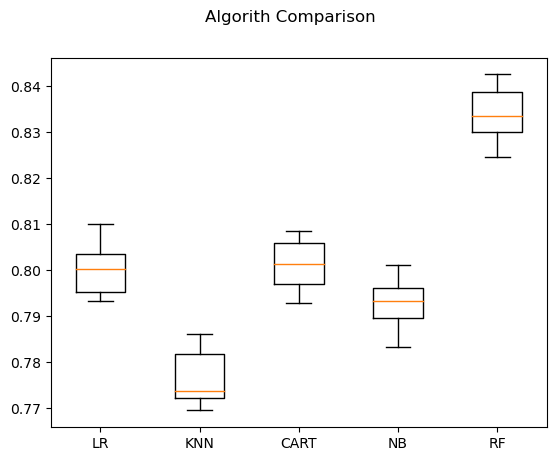

In [98]:
fig = plt.figure()
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Finalize Model

In [100]:
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy: 83.28125%
[[5831  568]
 [ 823 1098]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      6399
           1       0.66      0.57      0.61      1921

    accuracy                           0.83      8320
   macro avg       0.77      0.74      0.75      8320
weighted avg       0.83      0.83      0.83      8320

